# Atividade avançada 3f

Dessa vez, será que considerado que a função u(x,t) tem a forma $$\sum_{i=1}^{n} c_n u_n(x,t)$$, onde $c_n =1/n^2$ e $u(x,t) = \psi(x) e^{i\omega t}$ configurando assim uma serie de fourier complexa. 

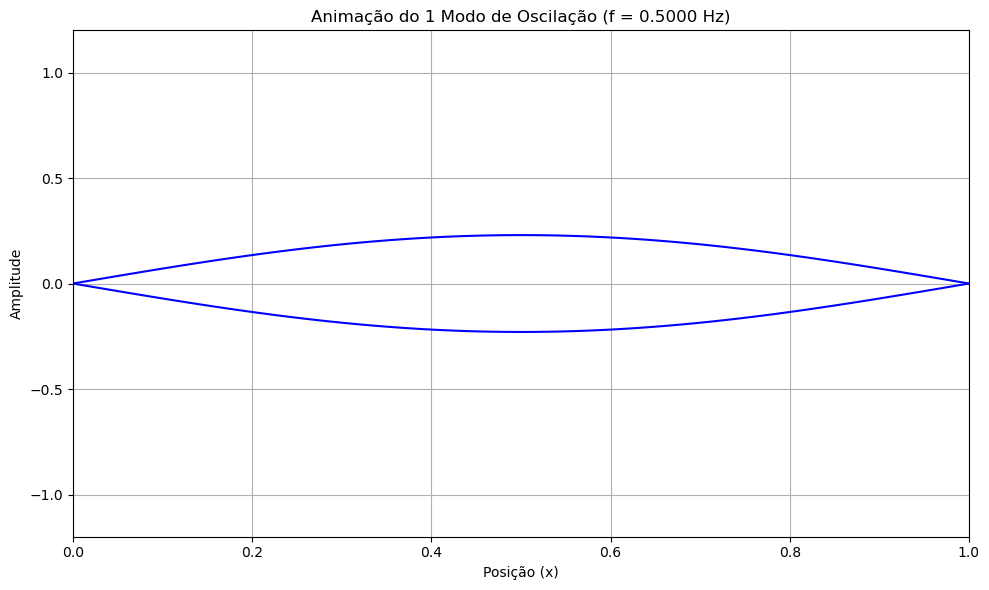

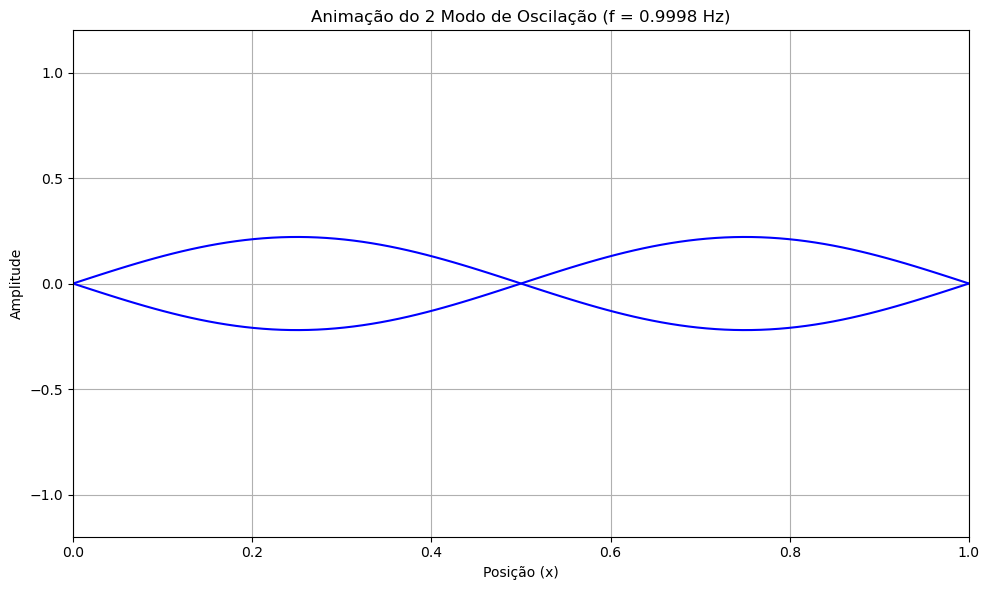

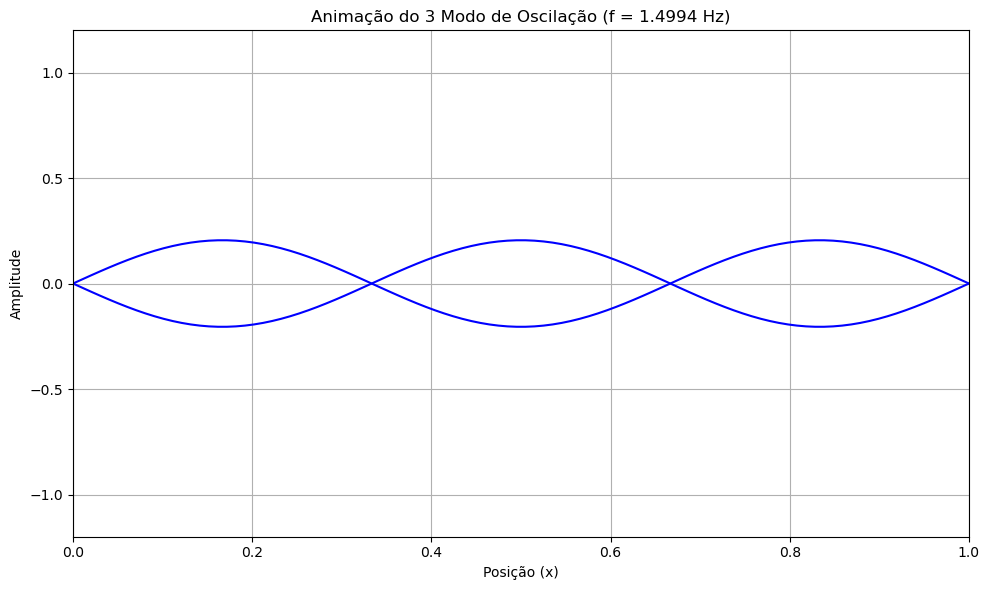

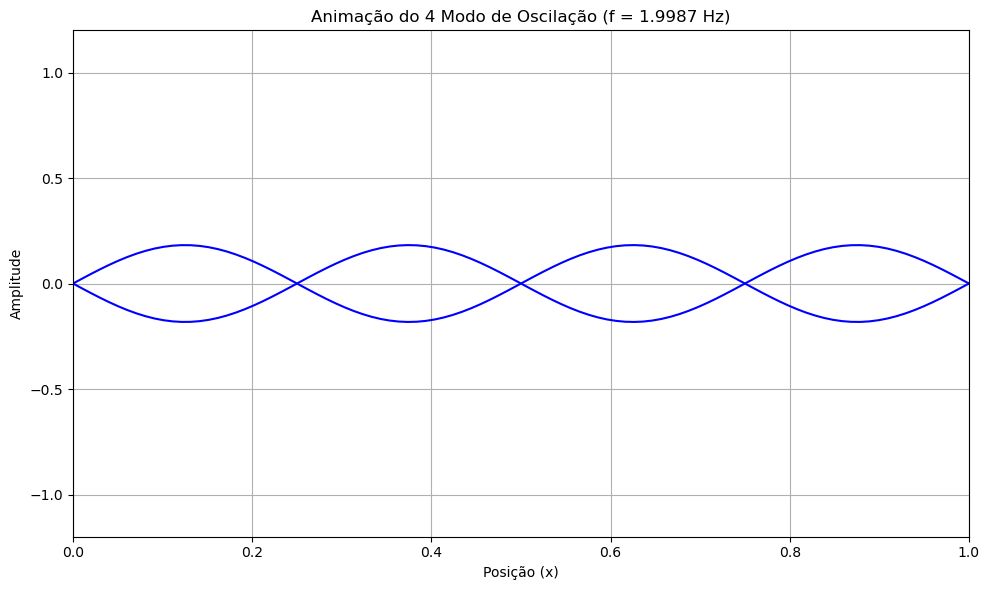

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Parâmetros do sistema
N = 100
L = 1.0
dx = L / (N - 1)
x = np.linspace(0, L, N) 

diagonal = -2 * np.ones(N-2)
diagonal_2 = np.ones(N-3)
D = (-1 / dx**2) * (np.diag(diagonal) + np.diag(diagonal_2, 1) + np.diag(diagonal_2, -1))

autovalores, autovetores = np.linalg.eigh(D)

# Frequências de oscilação 
omegas = np.sqrt(autovalores)  

for modo in range(4):
    psi = autovetores[:, modo]
    psi_completo = np.concatenate(([0], psi, [0]))
    x_completo = np.linspace(0, L, N)  
    omega = omegas[modo]


    fig, ax = plt.subplots(figsize=(10, 6))

    envoltoria_positiva, = ax.plot(x_completo, psi_completo)
    envoltoria_negativa, = ax.plot(x_completo, -psi_completo)

    ax.set_xlim(0, L)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('Posição (x)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Animação do {modo+1} Modo de Oscilação (f = {omega/(2*np.pi):.4f} Hz)')
    ax.grid(True)

    def update(frame):
        t = frame * 0.05  # Intervalo de tempo para cada frame
        soma = np.zeros_like(psi_completo)  #matriz de zeros para a soma
        
        for i in range(1, N+1):
            soma += (1/i**2) * psi_completo * np.cos(omega * t)
            

        envoltoria_positiva.set_ydata(soma)
        envoltoria_negativa.set_ydata(-soma)
        envoltoria_positiva.set_color('blue')
        envoltoria_negativa.set_color('blue')
        
        return envoltoria_positiva, envoltoria_negativa

    ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

   
    ani.save(f'{modo+1}_modo.gif', writer='pillow', fps=20)

    plt.tight_layout()
    plt.show()